<a href="https://colab.research.google.com/github/Jorge-89/Regresiones_TP_UNSAM/blob/main/Regresion_Lineal_(TP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Empezamos con los primeros modelos en Machine Learning.
Al haber una fuerte correlación lineal entre las variables temperatura y humedad, se toma la temperatura  y humedad de la estación Alicia como target y se toman las variables  humedad y temperaturas de estaciones vecinas como Features 




## **Regresión Lineal**

In [1]:
# importo librerias necesarias
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error as mse
from sklearn.pipeline import Pipeline
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import datasets, linear_model

from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
#se importa el set de datos
url = 'https://raw.githubusercontent.com/Jorge-89/Regresion-Lineal-/main/base_datos_estaciones_met_V3_train.csv'
df = pd.read_csv(url, sep=",")
df.columns

Index(['Unnamed: 0', 'fecha_completa', 'Fecha', 'Hora',
       'Temp_Alicia AgriculturaCba', 'Humedad_Alicia AgriculturaCba',
       'PP_Alicia AgriculturaCba', 'Temp_Las Varas AgriculturaCba',
       'Humedad_Las Varas AgriculturaCba', 'PP_Las Varas AgriculturaCba',
       'Temp_San Miguel - Establecimiento Don Luis',
       'Humedad_San Miguel - Establecimiento Don Luis',
       'PP_San Miguel - Establecimiento Don Luis',
       'Temp_San Miguel - Listello', 'Humedad_San Miguel - Listello',
       'PP_San Miguel - Listello', 'Temp_ San Miguel - Las Varillas',
       'Humedad_ San Miguel - Las Varillas', 'PP_ San Miguel - Las Varillas'],
      dtype='object')

In [3]:
x= df[[ 'Temp_Las Varas AgriculturaCba', 'Humedad_Las Varas AgriculturaCba',
        'Temp_San Miguel - Establecimiento Don Luis', 'Humedad_San Miguel - Establecimiento Don Luis',
       'Temp_San Miguel - Listello', 'Humedad_San Miguel - Listello',
       'Temp_ San Miguel - Las Varillas', 'Humedad_ San Miguel - Las Varillas']]
y= df["Temp_Alicia AgriculturaCba"]


In [4]:
#Separo los datos de "train" en entrenamiento y prueba "test" para probar los algoritmos
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
#se tarda demasiado al lograr estimar un CV con polinomios mayores a 5.
modelo = Pipeline([('scaler', StandardScaler()),('features', PolynomialFeatures()),
                    ('regression', LinearRegression(fit_intercept=True,normalize=True))
                    ])
hyperparameters={'features__degree':[1,2,3,4]}
grilla=GridSearchCV(modelo,hyperparameters,refit=True, cv=5,scoring='neg_mean_squared_error',)
grilla.fit(x_train,y_train)



GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('features',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('regression',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                   

In [ ]:
print(grilla.best_params_)
#Mejor polinomio es de grado 3



{'features__degree': 3}


In [ ]:
grilla.cv_results_

{'mean_fit_time': array([0.01207099, 0.02404327, 0.09575214, 0.28402367]),
 'mean_score_time': array([0.002669  , 0.00285802, 0.00799861, 0.00594745]),
 'mean_test_score': array([-0.62818533, -0.57255238, -0.51418979, -1.16691128]),
 'param_features__degree': masked_array(data=[1, 2, 3, 4],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'features__degree': 1},
  {'features__degree': 2},
  {'features__degree': 3},
  {'features__degree': 4}],
 'rank_test_score': array([3, 2, 1, 4], dtype=int32),
 'split0_test_score': array([-0.60074711, -0.55445189, -0.50263905, -0.58008939]),
 'split1_test_score': array([-0.62326237, -0.551102  , -0.48265721, -0.80064479]),
 'split2_test_score': array([-0.59801917, -0.56554808, -0.53546672, -2.13435465]),
 'split3_test_score': array([-0.64105507, -0.59040313, -0.53671426, -0.92872243]),
 'split4_test_score': array([-0.67784291, -0.6012568 , -0.51347169, -1.39074512]),
 'std_fit_time': ar

1 0.6281853261145739
2 0.5725523794610139
3 0.5141897870460943
4 1.1669112752661468


Text(0, 0.5, 'RMSE en validacion')

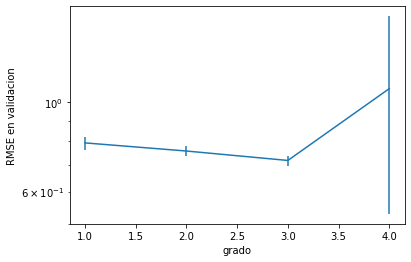

In [ ]:
for ni, i in enumerate(grilla.cv_results_['params']):
  print(i['features__degree'],-grilla.cv_results_['mean_test_score'][ni])
plt.errorbar(grilla.cv_results_['param_features__degree'].data,np.sqrt(-grilla.cv_results_['mean_test_score']),yerr=grilla.cv_results_['std_test_score'])
plt.yscale('log')
plt.xlabel('grado')
plt.ylabel('RMSE en validacion')


In [9]:
modelo2=Pipeline([['poly',PolynomialFeatures(degree=1,include_bias=True)],['regressor',LinearRegression(fit_intercept=True,normalize=True)]])
#entreno el modelo de grado 1 a ver que tanta diferencia hay en testeo con grado 3
modelo2.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=1, include_bias=True,
                                    interaction_only=False, order='C')),
                ['regressor',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=True)]],
         verbose=False)

In [ ]:
# Fit best model
modelo=grilla.best_estimator_
modelo.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('regression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=True))],
         verbose=False)

In [11]:
#hago las predicciones con x_test
y_pred_test = modelo.predict(x_test)
y_pred_test

array([24.34976014, 27.11960687, 14.73959439, ..., 34.10747576,
       27.78112784, 29.08855104])

In [ ]:
#hago las predicciones con x_test
y_pred_test = modelo2.predict(x_test)
y_pred_test

array([24.34976014, 27.11960687, 14.73959439, ..., 34.10747576,
       27.78112784, 29.08855104])

In [ ]:
"""
print('Precisión del modelo usando la raíz del error cuadratico medio (RMSE):')
score_testeo = mean_squared_error(y_test,y_pred_test,squared=True)

print (score_testeo)
"""
RMSE_modelo=cross_val_score(modelo,x_test,y_test,cv=5,scoring='neg_mean_squared_error')
errores = -RMSE_modelo
print(errores.mean(), errores.std())


0.7361426667452287 0.16407784713584572


In [19]:
RMSE_modelo=cross_val_score(modelo2,x_train,y_train,cv=20,scoring='neg_mean_squared_error')
errores = -RMSE_modelo
print(errores.mean(), errores.std())
#En testeo el menor error es con grado 1, evidentemente estuvo sobreajustando con grado 3, ya que en train era bajo el error pero en testeo aumento

0.6282584065802469 0.05130642434274515


In [ ]:
print('DATOS DEL MODELO REGRESIÓN LINEAL SIMPLE')
print()
print('Valor de los coeficientes de cada variale regresora usada en el modelo:')
print(modelo2['regressor'].coef_)
print()
print('Valor de la intersección o coeficiente "b":')
print(modelo2['regressor'].intercept_)


DATOS DEL MODELO REGRESIÓN LINEAL SIMPLE

Valor de los coeficientes de cada variale regresora usada en el modelo:
[ 0.          0.37570117  0.01384053  0.11154695 -0.02229318  0.12039505
  0.01905753  0.34436121 -0.01597822]

Valor de la intersección o coeficiente "b":
1.8896238736225754


# Como vimos en el modelo estandarizado, los coeficientes de la humedad son muy pequeños, aportando "posiblemente poco" al poder predictivo y complejizando al modelo

In [ ]:
x= df[[ 'Temp_Las Varas AgriculturaCba',
        'Temp_San Miguel - Establecimiento Don Luis', 
       'Temp_San Miguel - Listello', 
       'Temp_ San Miguel - Las Varillas']]
y= df["Temp_Alicia AgriculturaCba"]


In [ ]:
#Separo los datos de "train" en entrenamiento y prueba "test" para probar los algoritmos
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
#se tarda demasiado al lograr estimar un CV con polinomios mayores a 5.
modelo = Pipeline([('features', PolynomialFeatures()),
                    ('regression', LinearRegression(fit_intercept=False))
                    ])
hyperparameters={'features__degree':[1,2,3,4,5]}
grilla=GridSearchCV(modelo,hyperparameters,refit=True, cv=5,scoring='neg_mean_squared_error',)
grilla.fit(x_train,y_train)



GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('features',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('regression',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=False,
                                                         n_jobs=None,
                                                         normalize=False))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'features__degree': [1, 2, 3, 4, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_trai

In [ ]:
print(grilla.best_params_)
#Mejor polinomio es de grado 4



{'features__degree': 4}


In [ ]:
grilla.cv_results_

{'mean_fit_time': array([0.02511315, 0.01459546, 0.01683884, 0.07540298, 0.12943053]),
 'mean_score_time': array([0.00226002, 0.00314569, 0.00340586, 0.00476599, 0.00580797]),
 'mean_test_score': array([-0.63806278, -0.60801657, -0.59968551, -0.58577077, -1.71294372]),
 'param_features__degree': masked_array(data=[1, 2, 3, 4, 5],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'features__degree': 1},
  {'features__degree': 2},
  {'features__degree': 3},
  {'features__degree': 4},
  {'features__degree': 5}],
 'rank_test_score': array([4, 3, 2, 1, 5], dtype=int32),
 'split0_test_score': array([-0.63211008, -0.61404956, -0.59569031, -0.57961716, -0.56267682]),
 'split1_test_score': array([-0.66099787, -0.62719268, -0.63777948, -0.62051434, -1.34519572]),
 'split2_test_score': array([-0.63519832, -0.59609152, -0.58166977, -0.55858278, -0.56569112]),
 'split3_test_score': array([-0.61930649, -0.59034923, -0.58515069, -

1 0.6380627832788328
2 0.6080165652312258
3 0.5996855109028905
4 0.5857707686062805
5 1.71294372441528


Text(0, 0.5, 'RMSE en validacion')

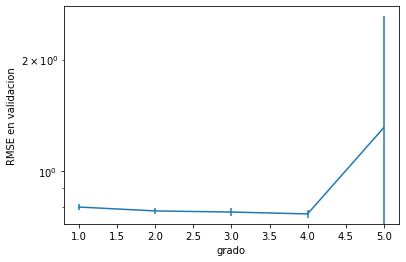

In [ ]:
for ni, i in enumerate(grilla.cv_results_['params']):
  print(i['features__degree'],-grilla.cv_results_['mean_test_score'][ni])
plt.errorbar(grilla.cv_results_['param_features__degree'].data,np.sqrt(-grilla.cv_results_['mean_test_score']),yerr=grilla.cv_results_['std_test_score'])
plt.yscale('log')
plt.xlabel('grado')
plt.ylabel('RMSE en validacion')


In [ ]:
modelo=Pipeline([['poly',PolynomialFeatures(degree=4,include_bias=True)],['regressor',LinearRegression(fit_intercept=True)]])
#entreno el modelo de grado 4 con los datos de entrenamiento
modelo.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=4, include_bias=True,
                                    interaction_only=False, order='C')),
                ['regressor',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False)]],
         verbose=False)

In [ ]:
#hago las predicciones con x_test
y_pred_test = modelo.predict(x_test)
y_pred_test

array([27.96084121, 30.36826671, 20.15276495, ..., 23.90033131,
       15.50804567, 21.64890201])

In [ ]:
y_test

6407     28.0
6301     30.6
304      20.1
12520    14.6
2417     26.6
         ... 
7514     18.9
4874     22.4
2372     23.0
8106     14.8
4115     22.1
Name: Temp_Alicia AgriculturaCba, Length: 2592, dtype: float64

In [ ]:

print('Precisión del modelo usando la raíz del error cuadratico medio (RMSE):')
score_testeo = mean_squared_error(y_test,y_pred_test,squared= False)

print (score_testeo)


Precisión del modelo usando la raíz del error cuadratico medio (RMSE):
0.8109282485507795


In [ ]:
print('DATOS DEL MODELO REGRESIÓN LINEAL SIMPLE')
print()
print('Valor de los coeficientes de cada variale regresora usada en el modelo:')
print(modelo['regressor'].coef_)
print()
print('Valor de la intersección o coeficiente "b":')
print(modelo['regressor'].intercept_)


DATOS DEL MODELO REGRESIÓN LINEAL SIMPLE

Valor de los coeficientes de cada variale regresora usada en el modelo:
[ 6.31970817e-10 -1.31324600e+00 -4.20203196e+00  2.99449218e+00
  1.82997885e+00 -4.10534153e-01  1.71768408e-01 -3.54848101e-01
  1.15838022e+00  4.58404050e-01  4.61633655e-02 -4.26301902e-01
 -3.88158571e-01  6.28613931e-01 -7.54236978e-01  2.22946771e-01
 -4.64194808e-02 -1.76002448e-01 -3.87147049e-01 -3.28736327e-02
  1.93140560e-01 -7.47199619e-02 -1.03438704e-01  3.80950463e-01
  1.80658167e-01 -4.04156065e-02  8.63906919e-02  2.61837605e-02
 -2.20253032e-01  8.39640279e-02 -8.61359918e-03  1.38031529e-01
 -3.70417225e-02 -2.36732677e-01  4.70273680e-02 -2.19108073e-02
  1.87453967e-02  3.31368124e-02  2.69272074e-02  8.42461916e-03
 -6.12810099e-02 -9.71659575e-03 -1.98369362e-02  6.65484466e-03
 -3.06014868e-02 -8.86387467e-03  3.22380416e-02 -2.29693435e-02
  4.71368422e-02 -3.92562357e-02  5.32429290e-02  2.15765771e-02
 -6.83703447e-02  7.36142994e-02 -2.43134

Precisión del modelo usando el error cuadratico medio (RMSE) con temperatura y humedad fue de: 0.51, mientras que son solo temperatura fue de 0.81

Queda demostrado que estimar la temperatura en una estación a partir de datos de temperatura de estaciones vecinas, es suficiente para tener un "error bajo". Sin embargo, una diferencia de 0.31 es más del 50%. Lo que puede significar conclusiones erróneas al detectar variaciones de temperaturas debido al cambio climático

Aunque pueda parecer poco, medio grado centígrado más de temperatura global tendría unos efectos enormes sobre nuestro planeta.

Por ejemplo, si la temperatura aumenta 2 °C, el hielo del ártico desaparecerá por completo en uno de cada diez veranos, y no en uno de cada cien como pasaría con un aumento del 1,5 °C. Estimar con la mayor precisión posible la temperatura hace que se pueda monitorear y llegar a conclusiones certeras si hay un aumento o no de la temperatura  

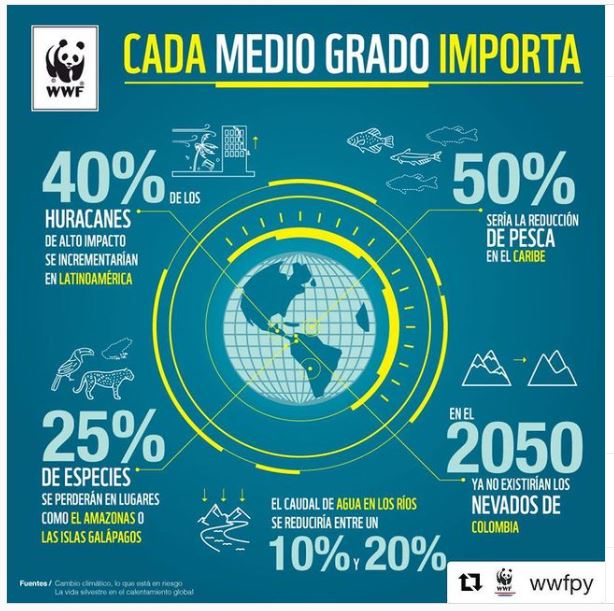

In [5]:
df2= df.copy()
df2["temperatura_alicia_calculada(mean)"]=df2[['Temp_Las Varas AgriculturaCba',
        'Temp_San Miguel - Establecimiento Don Luis', 
       'Temp_San Miguel - Listello', 
       'Temp_ San Miguel - Las Varillas']].mean(axis=1)
df2.head()
#verifico que se creo la nueva columna con la temperatura calculada mediante el promedio de las vecinas


,Unnamed: 0,fecha_completa,Fecha,Hora,Temp_Alicia AgriculturaCba,Humedad_Alicia AgriculturaCba,PP_Alicia AgriculturaCba,Temp_Las Varas AgriculturaCba,Humedad_Las Varas AgriculturaCba,PP_Las Varas AgriculturaCba,Temp_San Miguel - Establecimiento Don Luis,Humedad_San Miguel - Establecimiento Don Luis,PP_San Miguel - Establecimiento Don Luis,Temp_San Miguel - Listello,Humedad_San Miguel - Listello,PP_San Miguel - Listello,Temp_ San Miguel - Las Varillas,Humedad_ San Miguel - Las Varillas,PP_ San Miguel - Las Varillas,temperatura_alicia_calculada(mean)
0,7242,20/2/2021 7:00,20/2/2021,7:00,13.0,98.5,0.0,11.9,95.4,0.0,11.2,97.1,0.0,11.2,97.3,0.0,12.3,99.3,0.0,11.650
1,448,4/1/2021 2:40,4/1/2021,2:40,20.8,86.9,0.0,20.0,86.1,0.0,19.4,84.4,0.0,20.3,86.6,0.0,19.6,84.8,0.0,19.825
2,12732,30/3/2021 10:00,30/3/2021,10:00,20.8,70.9,0.0,20.3,74.3,0.0,21.4,72.7,0.0,19.6,71.7,0.0,19.5,78.5,0.0,20.200
3,756,6/1/2021 6:00,6/1/2021,6:00,14.7,97.7,0.0,15.2,93.6,0.0,14.3,94.5,0.0,15.1,98.8,0.0,14.1,96.8,0.0,14.675
4,11723,23/3/2021 9:50,23/3/2021,9:50,16.8,98.3,0.0,16.9,100.0,0.0,18.5,98.9,0.2,15.7,98.3,0.0,17.2,100.0,0.0,17.075


In [8]:
len(df2)

10368

In [7]:
print('Precisión del modelo usando el MSE):')
score_testeo = mean_squared_error(df2["Temp_Alicia AgriculturaCba"],df2["temperatura_alicia_calculada(mean)"],squared= True)
print (score_testeo)


Precisión del modelo usando la raíz del error cuadratico medio (RMSE):
1.0198069179205245


Usando el modelo más simple como el calculo de la media se obtiene un MSE de 1.022, esto es un 100% más de error con respecto a los 0.50 encontrados al aplicar el modelo de regresión lineal de grado 3 con las variables predictoras de temperatura y humedad